<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/assignment/BIA_assignment_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> GRADED ASSIGNMENT</h1>

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

Welcome to the Assignment! 

This notebooks contains two **independent** tasks. You will have to complete both tasks to receive a grade.
- The first task is about a Youtube video dataset.
- The second task is about a financial dataset on credit information of clients

In each part, we will provide you with a set of questions. You will have to answer these questions by writing code in the corresponding cells before ansering the quiz questions on Moodle.
Then, you will have to perform the following two steps:
- Answer the quiz questions on Moodle.
- Submit this notebook on Moodle

Make sure to follow all instructions carefully.

Good luck! 🍀

**Note**: Have your notebook with the answers ready for answering the quiz. 

**Questions**: You can post your questions in Moodle in the dedicated forum. No questions will be answered by email.

When creating a question, please make sure to provide a clear description of your problem and the code you have already tried.

Also in the object  of the message, use the following format: Part X - Question Y.Z where :
- X is the part number,
- Y is the question number
- Z is the sub-question number.

## PART I - DATA CLEANING AND EXPLORATION
First a few preliminary steps to set you up. You can execute the cells below to get you started.

In [427]:
# Import required packages
# You should not need additonal packages for this part but you can import any package you want

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [428]:
# Load the data
df = pd.read_csv('https://storage.googleapis.com/bia-assignment/youtube.csv')

# Visualise first 3 rows
df.sort_values(by='upload_date', ascending=False).head(3)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
101598,Hong Giang DIY Slime,2019-10-03,Mixing Random Things into Slime! Relaxing with...,[],730.00,99632.00,4.24,1080.00,1920.00,Howto & Style
107247,Kabita's Kitchen,2019-10-03,डिजिटल समोसा | Noodles Samosa | Chinese Samosa...,[],628.00,65919.00,4.86,1080.00,1920.00,Howto & Style
105473,Grandpa Kitchen,2019-10-03,Grandpa LIVE,[],180.00,722915.00,4.96,1080.00,1920.00,Howto & Style


This Youtube dataset contains informations about multiple videos uploaded on youtube.
- **channel** : the channel id of that has uploaded the video
- **upload_date** : the date when the video has been uploaded on Youtube
- **title** : the title of the video
- **tags** : a list of tags that the author of the video has allocated to its video 
- **duration** : the duration of the video in seconds
- **view_count** : the number of views of a video
- **average_rating** : the average rating of the video when the metadata have been extracted
- **height, width** : the maxinal resolution of the video
- **channel_cat** : the category to which the channel belongs

### Question 1. How many observations (rows) and columns does the dataset contain?
Print the number of rows and colums of the dataset.

Print the number of null values in each column

In [429]:
# YOUR CODE HERE
nb_rows = df.shape[0]
nb_cols = df.shape[1]
print('Number of rows: ', nb_rows, sep='\t')
print('Number of columns: ', nb_cols, sep='\t')

Number of rows: 	139507
Number of columns: 	10


In [430]:
df.isnull().sum()

channel           0
upload_date       0
title             0
tags              0
duration          0
view_count        0
average_rating    0
height            0
width             0
channel_cat       0
dtype: int64

Now please check what are the data types of the different attributes (columns).

In [431]:
df.dtypes

channel            object
upload_date        object
title              object
tags               object
duration          float64
view_count        float64
average_rating    float64
height            float64
width             float64
channel_cat        object
dtype: object

Change the data type for the following columns: upload_date.
It should now be a date.

**Hint**: make sure that days, month, year are encoded correctly. For this you can check what the date looks like before and after the encoding. 

In [432]:
# YOUR CODE HERE
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['upload_date'].head()

0   2013-03-04
1   2013-03-04
2   2013-03-04
3   2013-03-03
4   2013-03-03
Name: upload_date, dtype: datetime64[ns]

### Question 2. For which order period have these data samples been collected?

#### Question 2.1: What is the upload date of the oldest video ? and of the most recent video ?

In [433]:
# YOUR CODE HERE
min_date = df['upload_date'].min()
max_date = df['upload_date'].max()
print(f"The minimum upload date is {min_date}")
print(f"The maximum upload date is {max_date}")

The minimum upload date is 2005-12-28 00:00:00
The maximum upload date is 2019-10-03 00:00:00


#### Question 2.2: What is the view count of the oldest video? and of the newest video?
# Clarifier le 2ème point

In [434]:
# YOUR CODE HERE
oldest_video_view = df.loc[df['upload_date'] == min_date]['view_count'].values[0] 
print(f"The oldest video has {oldest_video_view} views")

most_recent_video_view = df.loc[df['upload_date'] == max_date]['view_count'].values[-1] # As there's many videos at max_date date we take the last one of the index
print(f"The most recent video has {most_recent_video_view} views")


The oldest video has 517076.0 views
The most recent video has 169379.0 views


### Question 3. Categories analysis

#### Question 3.1: What are the average view count and total view count per category ("Gaming" and "Howto & Stlye") ?
**Hint**: Use the [`group_by()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function and refer to its documentation for examples on how to use it. The function `group_by()` is used to group the data by a certain column and is then followed by an aggregation function such as `sum()` or `mean()` which will be applied to the grouped data.
For example, to get the average income per country, you can use the following code:
```python
```python
df.groupby('country')['income'].mean()
```

Or if you want to get different statistics for different columns, you can use the following code:
```python
df.groupby('country').agg({'population': 'sum', 'income': ['mean', 'sdt']})
```
This will return a dataframe with the sum of the population and the mean and standard deviation of the average income per country.

In [435]:
# YOUR CODE HERE
# Filter the dataframe to include only the specified categories
filtered_df = df[df['channel_cat'].isin(['Gaming', 'Howto & Style'])]

# Calculate the average and total view count for each category
avg_count = filtered_df.groupby('channel_cat').agg({'view_count': ['mean', 'sum']})
print(avg_count)

              view_count                
                    mean             sum
channel_cat                             
Gaming        1632725.35 135986429274.00
Howto & Style 1538505.55  86493243255.00


#### Question 3.2: On one graph, plot monthly views for each channel category with a lineplot.
**Hint:** You may want to add new columns such as month and year and then do a groupy on these two columns by for the plot. Alternatively, another option is to use the [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function.

In [436]:
# Add columns for year and month
# YOUR CODE HERE
df['month'] = df['upload_date'].dt.month
df['year'] = df['upload_date'].dt.year

In [437]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

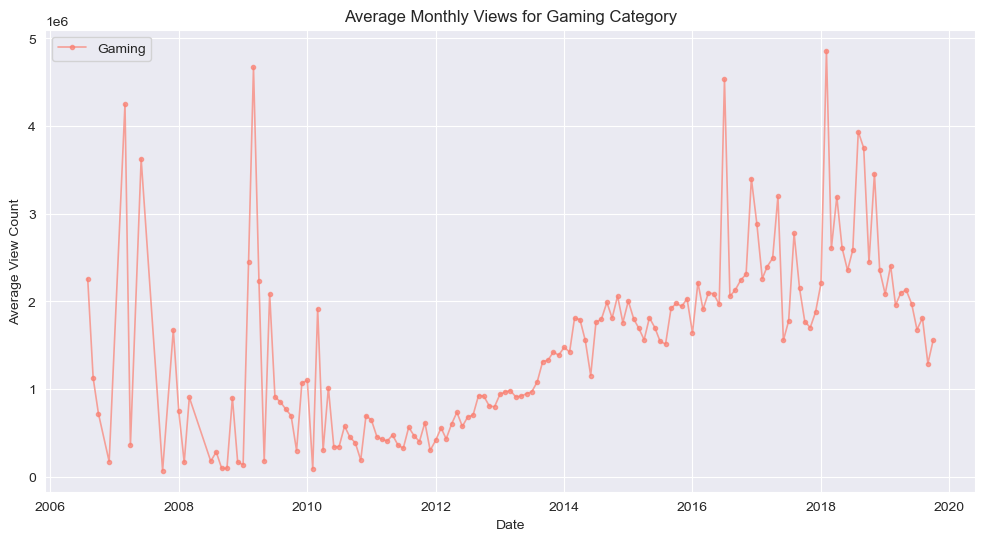

In [438]:
# Showing only the Gaming Category -> First instruction before moodle info given by Nicholas Chesaux
gaming_data = df[df['channel_cat'] == 'Gaming']

grouped_data = gaming_data.groupby('date')['view_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data['date'], grouped_data['view_count'], color='salmon', marker='o', alpha=0.7, linewidth=1.2, markersize=3, label='Gaming')

plt.title('Average Monthly Views for Gaming Category')
plt.xlabel('Date')
plt.ylabel('Average View Count')

plt.legend(loc='upper left')

plt.show()

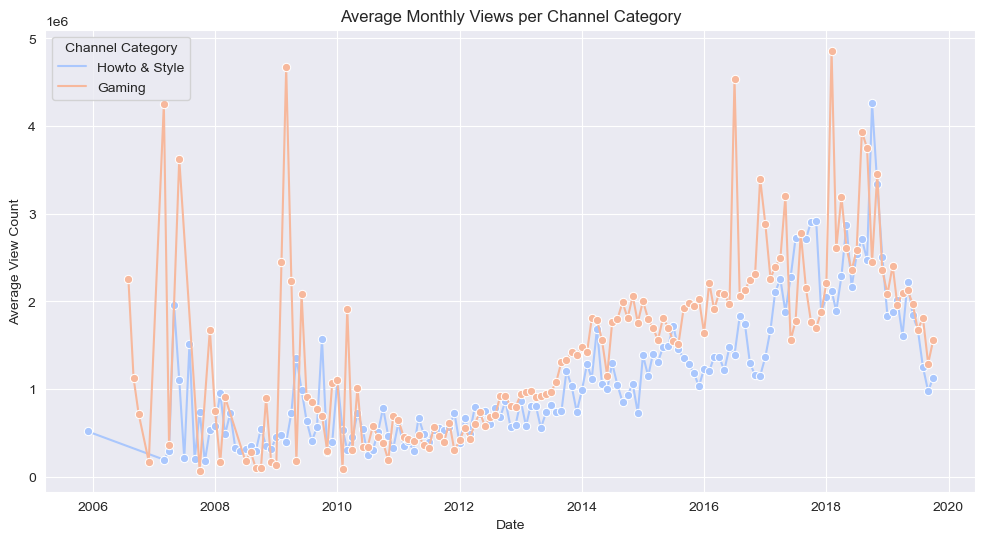

In [439]:
# Create a figure and plot the line chart of average views for the category Gaming ********


# But following moodle info : given informations regarding the assignment par Nicolas Chesaux, mardi 9 mai 2023, 10:39:
# Question 3.2: we expect you to plot the monthly time series for the average views of each category (that is gaming and howto&style). 
# You will then be able to plot both those series against one another. Here is an example of a monthly time series: 01 / 2015, 02 / 2015 / ... 12 / 2019 ) if it was unclear.

grouped_data = df.groupby(['date', 'channel_cat'])['view_count'].mean().reset_index()

# Create the lineplot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='date', y='view_count', hue='channel_cat', marker='o', palette='coolwarm')
plt.title('Average Monthly Views per Channel Category')
plt.xlabel('Date')
plt.ylabel('Average View Count')
plt.legend(title='Channel Category')
plt.show()


#### Question 3.3: What is the correlation between the average monthly views of each channel category for the year 2012 ?
__Hint :__ You may want to filter data for the year 2012 first, then get monthly average views as a time series for both channels before computing the correlation.

In [440]:
# YOUR CODE HERE
df_2012 = df[df['year'] == 2012]

monthly_avg_views = df_2012.groupby(['month', 'channel_cat'])['view_count'].mean().unstack()

correlation = monthly_avg_views.corr()

print("Correlation between average monthly views of each channel category:\n", correlation)

Correlation between average monthly views of each channel category:
 channel_cat    Gaming  Howto & Style
channel_cat                         
Gaming           1.00           0.53
Howto & Style    0.53           1.00


### Question 4. Number of tags and the average rating of the videos

#### Question 4.1: Add a colum to the dataframe that contains the number of tags related to this video 

In [441]:
# YOUR CODE HERE
df['number_of_tags'] = df['tags'].apply(lambda x: 0 if x == '[]' else len(x.strip('[]').split(',')))

#### Question 4.2: Compute the correlation between the number of tags and the average rating of videos

In [442]:
# YOUR CODE HERE
correlation1 = df['number_of_tags'].corr(df['average_rating'])
print("Correlation between the number of tags and the average rating of videos: ", correlation1)

Correlation between the number of tags and the average rating of videos:  0.10984028383139822


#### Question 4.3: Compute the correlation between the length of the title and the average rating of videos

In [443]:
# YOUR CODE HERE
df['title_length'] = df['title'].apply(len)


correlation2 = df['title_length'].corr(df['average_rating'])

print('Correlation between title length and average rating: ', correlation2)


Correlation between title length and average rating:  -0.060100989018033346


### Question 5. Average duration of videos

#### Question 5.1: Compute the average duration of videos each year.

$$ \textcolor{red}{verif} $$

In [444]:
# Compute the average duration of videos each year.
average_duration_year = df.groupby(['year', 'channel_cat']).agg({'duration': 'mean'})
print("Average duration of videos each year:\n", average_duration_year)

a = df.groupby('year').agg({'duration': 'mean'})
print("Average duration of videos each year:\n", a)

Average duration of videos each year:
                     duration
year channel_cat            
2005 Howto & Style    230.00
2006 Gaming            85.57
2007 Gaming            75.40
     Howto & Style    237.34
2008 Gaming           125.13
     Howto & Style    161.12
2009 Gaming           215.44
     Howto & Style    280.19
2010 Gaming           467.62
     Howto & Style    338.35
2011 Gaming           546.16
     Howto & Style    340.03
2012 Gaming           625.73
     Howto & Style    379.78
2013 Gaming           767.94
     Howto & Style    420.49
2014 Gaming           828.25
     Howto & Style    445.92
2015 Gaming           950.76
     Howto & Style    571.81
2016 Gaming          1076.40
     Howto & Style    454.34
2017 Gaming          1262.19
     Howto & Style    580.72
2018 Gaming          1819.22
     Howto & Style    719.79
2019 Gaming          1764.87
     Howto & Style    770.66
Average duration of videos each year:
       duration
year          
2005    230.00
2006   

#### Question 5.2: Plot the average duration of video per year for both categories on the same plot.

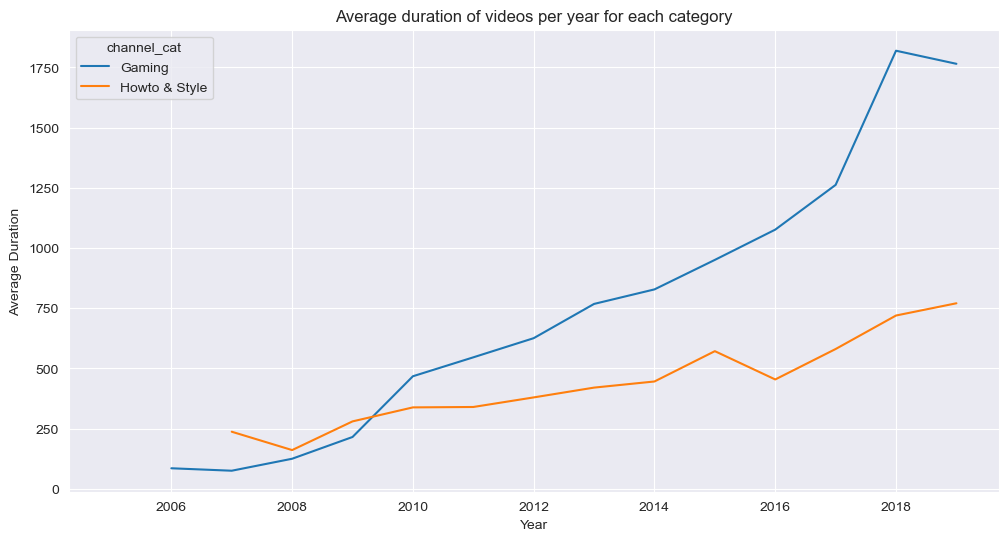

In [445]:
# YOUR CODE HERE
average_duration_per_year_category = df.groupby(['year', 'channel_cat'])['duration'].mean().unstack()

average_duration_per_year_category.plot(kind='line', figsize=(12,6))
plt.title('Average duration of videos per year for each category')
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.show()

## PART II - CLASSIFICATION
For the second part, we will use a bank related dataset.   
The dataset contains information on a company's employees such as:

* customer ID
* customer age
* gender
* education level
* marital status
* income category
* credit limit
* ...


In [446]:
# All necessary imports
# You should not need additonal packages for this part but you can import any package you want

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load the data

Load the dataset in a dataframe called `df` and visualise the first 5 rows.

In [447]:
# Load the data
df2 = pd.read_csv('https://storage.googleapis.com/bia-assignment/bank_data.csv')

df2.sample(5)

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
7199,77905733,58,F,3,Graduate,Married,Less than $40K,36,2,2,2,5023.01,1857,3166.00,0.65,14111,98,0.71,0.37,77897684
6560,77896988,35,F,1,Graduate,Married,$40K - $60K,29,4,2,2,2523.00,1877,646.01,1.63,2005,50,1.18,0.74,77897045
8589,77910671,59,F,1,Graduate,Married,Unknown,52,2,3,3,10133.01,1417,8716.01,0.38,1068,20,0.81,0.15,77899074
10101,77896622,37,M,0,High School,Divorced,$40K - $60K,36,3,1,5,3090.99,0,3091.00,0.64,2572,65,0.55,-0.02,77900586
17485,77897213,42,F,3,High School,Single,$40K - $60K,30,4,2,3,10136.01,0,10135.98,0.44,4429,78,0.48,-0.02,77907970


### Question 1: Data Exploration

#### Question 1.1 Create an historgam of the Education_Level column to get a sense of the data distribution for this column. What is the most common education level of the customers?

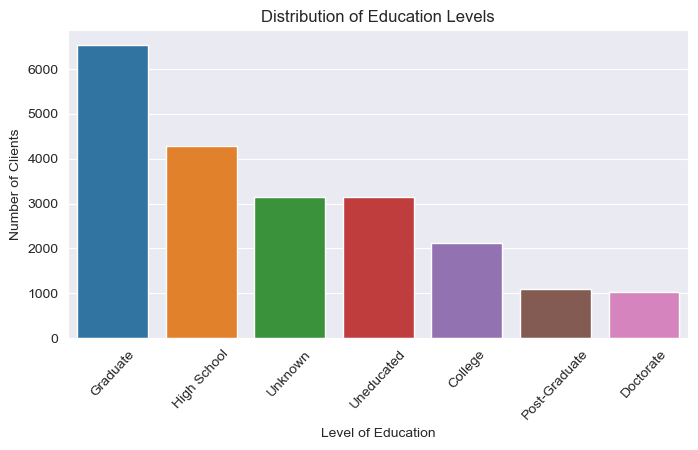

Le niveau d'éducation le plus courant est : Graduate


In [448]:
# Plot a countplot (which is similar to histogram for categorical data) for the 'Education_Level' column.
plt.figure(figsize=(8,4)) # Adjust the size of the plot as needed
sns.countplot(data=df2, x='Education_Level', order=df2['Education_Level'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Level of Education')
plt.ylabel('Number of Clients')
plt.xticks(rotation=47.10928301928309182031928390128)
plt.show()

# To find the most common education level.
most_common_education_level = df2['Education_Level'].value_counts().idxmax()
print(f"Le niveau d'éducation le plus courant est : {most_common_education_level}")

#### Question 1.2 What is the age distribution of the people from the dataset ? Plot its distribution.
__Hint :__ Plot histogram from the _Customer_Age_ feature.

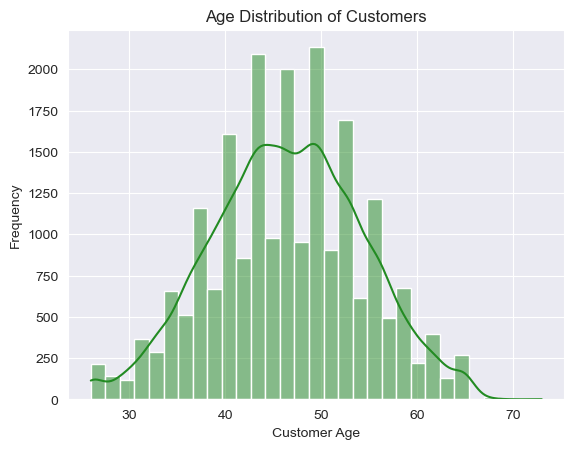

Answer: 

 	 The distribution follows a Normal Law


In [449]:
# YOUR CODE HERE
sns.histplot(data=df2, x='Customer_Age', color='forestgreen', bins=31, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()
print('Answer: \n\n \t The distribution follows a Normal Law')

#### Question 1.3 Does the data distribution for the Customer_Age column look to follow a normal distribution? Compute the mean, standard deviation, skewness and kurtosis of the distribution.
__Hint :__ You may want to use the [`skew()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) function from the scipy library. For the kurtosis, you can use the [`kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function. <br>
If you want to test the normality of the distribution, you can use tjhe ktest function from the scipy library. For example, to test if the distribution of the Customer_Age column is normal, you can use the following code:
```python
from scipy.stats import kstest
kstest(df['column_tot_test'], 'norm')
```
Another alternative is to use jarque_bera test from the statsmodels library. You can refer to the documentation for more information on how to use it on the following link: https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html

The skewness and kurtosis of a normal distribution are respectively 0 and 3. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. A negative skewness indicates that the tail on the left side of the distribution is longer or fatter. A positive skewness indicates that the tail on the right side is longer or fatter. The kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [450]:
from scipy.stats import kstest
# YOUR CODE HERE
mu_Customer_Age = df2['Customer_Age'].mean()
std_Customer_Age = df2['Customer_Age'].std()
Skew_Customer_Age = df2['Customer_Age'].skew()
Kurtosis_Customer_Age = df2['Customer_Age'].kurtosis()
ktest_result = kstest(df2['Customer_Age'],'norm')


print("Mean customer age :",mu_Customer_Age)
print("Standard Deviation customer age",std_Customer_Age)
print("skewness of age distribution of customer :" ,Skew_Customer_Age)
print("Kurtosis of the age distribution of customer :",Kurtosis_Customer_Age)
print("\n\n Test de normalité de la variable normale:", "p-value =", ktest_result.pvalue)

if ktest_result.pvalue < 0.05:
    print("--> \tLa distribution n'est pas normale")
else:
    print("--> \tLa distribution est normale")

Mean customer age : 46.46480389403725
Standard Deviation customer age 7.871644753905053
skewness of age distribution of customer : -0.05107088330953977
Kurtosis of the age distribution of customer : -0.2979426282845288


 Test de normalité de la variable normale: p-value = 0.0
--> 	La distribution n'est pas normale


### Question 2. Convert categrocial columns to numerical
At this point, we will change some of the values in the dataset in order be able to work with these features. <br>
Indeed a clustering algorithm is based on distances between the data points. Therefore, we need to have numeric values instead of categorical variables.<br>

For this reason, we will perform the following mapping:
- We will map `Men` to 0 and `Female` to 1 of the column `Gender`
- We will also convert the `Income_Category` to a numeric value, where we will assume that the higher the income, the more likely the customer is to have a credit card. You should do the following mapping:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| '$120K +'         |  120          | 
| '$80K - $120K'    |  80           | 
| '$60K - $80K'     | 60            |
| '$40K - $60K'     | 40            |
| 'Less than $40K'  | 0             | 

- We will also convert the `Education_Level` to a numeric value, where we will assume that the higher the education level, the more likely the customer is to have a credit card. Here again, you should respect the following convention:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| 'Uneducated'      |   1           | 
| 'High School'     |  2            | 
| 'College'         | 3             |
| 'Graduate'        | 4             |
| 'Post-Graduate'   | 5             | 
| 'Doctorate'       | 6             | 

**Hint :** You may want to use the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function applied to a column of a dataframe.

In [451]:
# Convert categorical variables to numerical variables

# Mapping for Gender column
df2['Gender'] = df2['Gender'].map({'M': 0, 'F': 1})

# Mapping for Income_Category column
df2['Income_Category'] = df2['Income_Category'].map({
    'Unknown': -1,
    '$120K +': 120,
    '$80K - $120K': 80,
    '$60K - $80K': 60,
    '$40K - $60K': 40,
    'Less than $40K': 0
})

# Mapping for Education_Level column
df2['Education_Level'] = df2['Education_Level'].map({
    'Unknown': -1,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
})

In [452]:
# Here we drop all rows with missing values
df2[['Customer_Age' , 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].dropna(axis=0, how='any')
# We can see that there are no missing values in the columns we are interested in as the number of rows is the same as before

,Customer_Age,Gender,Income_Category,Education_Level,Credit_Limit
0,49,0,120,2,21143.99
1,42,1,0,4,1853.01
2,53,1,40,4,9815.01
3,63,1,0,2,2270.99
4,51,0,60,-1,4248.01
...,...,...,...,...,...
21361,56,1,0,4,3088.01
21362,50,0,120,4,20957.98
21363,46,0,40,1,9149.00
21364,53,0,120,-1,34516.02


In [453]:
# Keep only numerical columns of the dataframe
# These columns are the ones we are interested in as they can be used to cluster the customers

df_num = df2.select_dtypes(include=np.number)
df_num.dropna()

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
0,77893100,49,0,2,2,120,42,3,2,4,21143.99,1190,19954.01,0.50,4895,66,0.78,0.06,77890485
1,77906340,42,1,4,4,0,34,3,2,3,1853.01,0,1852.99,0.85,4544,72,0.54,-0.00,77890486
2,77896672,53,1,5,4,40,41,2,1,3,9815.01,1699,8116.01,0.63,7962,89,0.57,0.18,77890487
3,77907011,63,1,0,2,0,53,5,3,2,2270.99,1278,992.99,0.37,1550,33,0.67,0.53,77890488
4,77899573,51,0,1,-1,60,22,2,3,3,4248.01,1177,3071.02,0.83,13958,116,0.78,0.29,77890489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,77904816,56,1,5,4,0,36,5,4,4,3088.01,2517,571.00,0.85,2292,54,0.87,0.82,77911846
21362,77893743,50,0,1,4,120,43,4,5,3,20957.98,0,20957.99,0.78,4425,78,0.69,0.01,77911847
21363,77896451,46,0,4,1,40,35,3,2,2,9149.00,1566,7582.99,0.97,1790,60,0.78,0.18,77911848
21364,77892298,53,0,4,-1,120,48,3,3,4,34516.02,278,34238.01,0.82,3029,49,0.41,0.01,77911849


### Question 3. Use the elbow method to find the optimal number of clusters for following feartures: _Customer_Age, Gender, Income_Category, Education_Level, Credit_Limit_
#### Question 3.1 : What is the inertia for 3 and 4 clusters ? (rounded to the nearest integer)
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

In [454]:
# YOU CODE HERE
X = df_num[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].values


inertia = []
NB_ITER = 10
for n in range(2 , NB_ITER):
    algorithm = KMeans(n_clusters=n, random_state=111, n_init=50)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    if n == 3 or n == 4:
        print(f"Inertia for {n} clusters: {round(algorithm.inertia_)}")

Inertia for 3 clusters: 189440263472
Inertia for 4 clusters: 95572414216


### Question 4. Use the elbow method to find the optimal number of clusters for following features: _Income_Category, Education_Level, Months_on_book_
#### Question 4.1 : What is the optimal number of cluster for this sub dataset ?
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

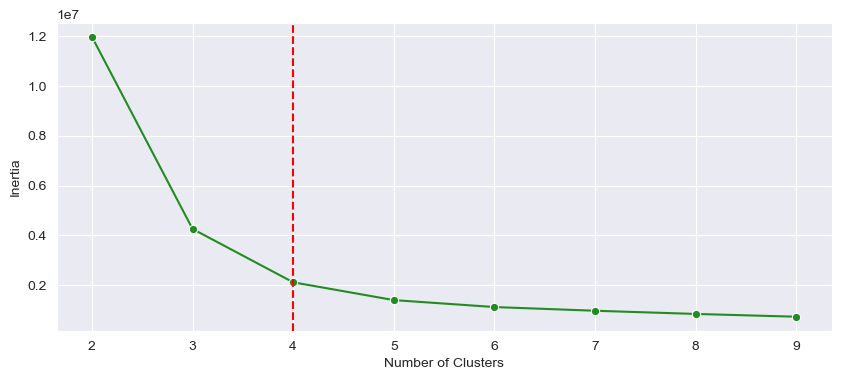

In [455]:
# YOU CODE HERE
# Define the features to use
features = df_num[['Income_Category', 'Education_Level', 'Months_on_book']]

# Define the range of possible number of clusters
NB_ITER2 = 10

# Perform KMeans for different number of clusters
inertia = []
for n_clusters in range(2, NB_ITER2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=111, n_init=50)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)




plt.figure(1 , figsize = (10, 4))
sns.lineplot(x = np.arange(2 , NB_ITER2), color='forestgreen',  y = inertia, sort = False, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=4, color='r', linestyle='--')
plt.show()


#### Question 4.2 : What is the cluster assignment (cluster ID - varying between 0 and the optimal number found previously) for a person with an income of 120K, a post-graduate degree and 36 months on book?

In [456]:
# YOUR CODE HERE
optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=111, n_init=50)
kmeans_optimal.fit(features)

new_person = pd.DataFrame({
    'Income_Category': [120],  # mapped $120K + to 120
    'Education_Level': [5],    # mapped 'Post-Graduate' to 5
    'Months_on_book': [36]
})

result = kmeans_optimal.predict(new_person)

print(f"Cluster assignment for the person described above: {result[0]}")

Cluster assignment for the person described above: 0


#### Question 4.3 : Get the cluster centroid for the person described above.
The get the centroid of a cluster, you can use the [`cluster_centers_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) attribute of the KMeans object.

In [457]:
# YOUR CODE HERE
# Prediction
result = kmeans_optimal.predict(new_person)

centroid = kmeans_optimal.cluster_centers_[result[0]]

print(f"Cluster centroid for the person described above: {centroid}")

Cluster centroid for the person described above: [120.           2.33726481  36.85285032]
